## **트리 (Trees)**
 - 트리는 <span style="color:red">**노드(node)**</span>와 노드들을 연결하는 <span style="color:red">**에지(edge)**</span>로 이루어진 자료 구조
 - 특징
   1. 각 노드는 하나의 부모 노드와 여러개의 자식 노드를 가질 수 있음.
   2. 트리는 그래프의 한 종류로, 루트(root) 노드에서 시작하여 모든 노드를 방문할 수 있는 구조

In [ ]:
class Node:
    def __init__(self, data, left_node, right_node):
        self.data = data
        self.left_node = left_node
        self.right_node = right_node

n = int(input())
tree = {}
for _ in range(n):
    data, left_node, right_node = input().split()
    if left_node == 'None':
        left_node = None
    if right_node == 'None':
        right_node = None
    tree[data] = Node(data, left_node, right_node)


#### **트리 순회 (Tree Traversal)**
   1. 전위 순회 (preorder traversal) : 부모노드 -> 왼쪽 자식노드 -> 오른쪽 자식노드
   2. 중위 순회 (inorder traversal) : 왼쪽 자식노드 -> 부모노드 -> 오른쪽 자식노드
   3. 후위 순회 (postorder traversal) : 왼쪽 자식노드 -> 오른쪽 자식노드 -> 부모노드

#### **전위 순회 (Preorder Traversal)**
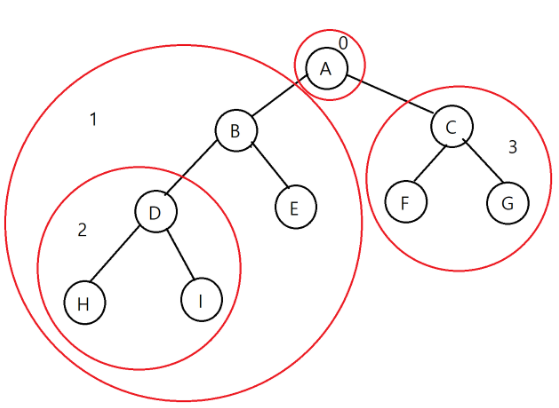

In [ ]:
def preorder(node):
    print(node.data, end='')
    if node.left_node != None:
        preorder(tree[node.left_node])
    if node.right_node != None:
        preorder(tree[node.right_node])

#### **중위 순회 (Inorder Traversal)**
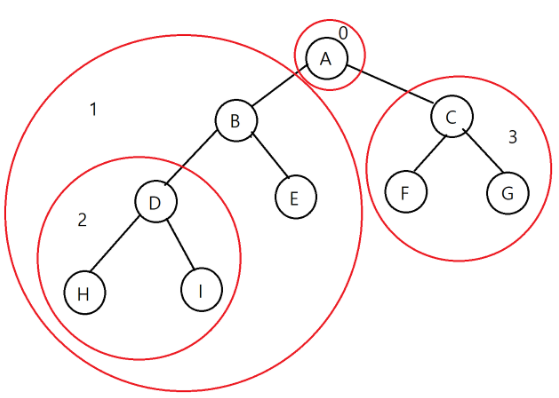

In [ ]:
def inorder(node):
    if node.left_node != None:
        inorder(tree[node.left_node])
    print(node.data, end='')
    if node.right_node != None:
        inorder(tree[node.right_node])

#### **후위 순회 (Postorder Traversal)**
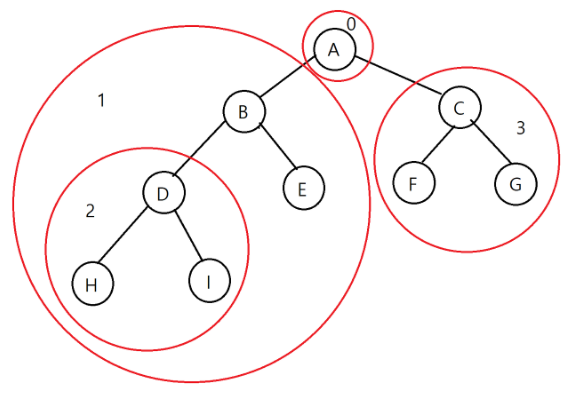

In [ ]:
def postorder(node):
    if node.left_node != None:
        postorder(tree[node.left_node])
    if node.right_node != None:
        postorder(tree[node.right_node])
    print(node.data, end='')

1991번 트리순회 <span style="color:green">성공</span> - 2025.04.16

In [ ]:
class Node:
    def __init__(self, data, left_node, right_node):
        self.data = data
        self.left_node = left_node
        self.right_node = right_node

def preorder(node):
    print(node.data, end='')
    if node.left_node != None:
        preorder(tree[node.left_node])
    if node.right_node != None:
        preorder(tree[node.right_node])

def inorder(node):
    if node.left_node != None:
        inorder(tree[node.left_node])
    print(node.data, end='')
    if node.right_node != None:
        inorder(tree[node.right_node])

def postorder(node):
    if node.left_node != None:
        postorder(tree[node.left_node])
    if node.right_node != None:
        postorder(tree[node.right_node])
    print(node.data, end='')

n = int(input())
tree = {}
for _ in range(n):
    data, left_node, right_node = input().split()
    if left_node == '.':
        left_node = None
    if right_node == '.':
        right_node = None
    tree[data] = Node(data, left_node, right_node)

preorder(tree['A'])
print()
inorder(tree['A'])
print()
postorder(tree['A'])

2250번 트리의 높이와 너비 <span style="color:red">실패</span> - 2025.04.17

In [ ]:
# 못풀었지만 답을 보니 어려운게 하나도 없었던 문제였다...
# 아직 트리를 다루는 것에 많이 익숙하지 않은듯...
# 이번 문제 통해서 트리를 활용하는 법을 많이 배운것 같다. (진짜 중요한 문제)
# 추가로 이런 트리 자료구조에서 DFS 사용방법을 배웠다
# https://ji-gwang.tistory.com/416

# 문제는 단순하게 트리의 깊이를 구하고, 중위순회를 돌리면서 번호를 매기면 되는 문제였다.
# 중위순회를 돌면서 찾아지는 순서가 해당 노드의 너비가 된다.
# 이 후 너비의 최대값을 찾아주면 되는 문제.

# 이진 트리를 돌면서 번호를 매겨준다.
def dfs(start, depth):
    global max_level

    visited[start] = True
    tree[start][3] = depth
    max_level = max(max_level, depth)

    for next in range(2):
        if not visited[tree[start][next]]:
            dfs(tree[start][next], depth + 1)

# 이진트리를 돌면서 트리의 깊이를 매겨준다.(이건 한적 있는데...)
def inorder(v):
    global order

    if v:
        inorder(tree[v][0])
        tree[v][4] = order
        order += 1
        inorder(tree[v][1])

n = int(input())

tree = [[0, 0, 0, 0, 0] for _ in range(n + 1)] # 왼쪽, 오른쪽, 부모, 레벨, 너비
for _ in range(n):
    node, left, right = map(int, input().split())

    if left == -1: left = 0
    if right == -1: right = 0

    tree[node][0] = left
    tree[node][1] = right
    tree[left][2] = node
    tree[right][2] = node

visited = [False for _ in range(n + 1)]
visited[0] = True

# 루트 번호 찾기 (부모가 없은 노드가 루트이므로)
root = 0
for i in range(1, n + 1):
    if tree[i][2] == 0:
        root = i

# 깊이의 최대치 찾기
max_level = 0
dfs(root, 1)

# 노드에 순서 매기기
order = 1 # 순서를 매길 번호
inorder(root) # 중위순회를 루트부터 돌린다.

# 각 레벨의 너비를 구하기 위해 각 노드가 해당하는 깊이에 해당 노드의 너비를 append
level_list = [[] for _ in range(max_level + 1)]
for i in range(1, n + 1):
    level_list[tree[i][3]].append(tree[i][4])

# 마지막 최대 너비 구하기
ans = []
for i in range(len(level_list)):
    if len(level_list[i]) <= 1: # 해당 깊이에 노드가 하나밖에 없다면 1
        ans.append(1)
    else:
        ans.append(max(level_list[i]) - min(level_list[i]) + 1)

print(ans.index(max(ans), 1), max(ans))

11725번 트리의 부모 찾기 <span style="color:green">성공</span> - 2025.04.18

In [ ]:
import sys
sys.setrecursionlimit(10**6)
# input = sys.stdin.readline

def dfs(start):
    for next in graph[start]:
        if parent[next] == 0:
            parent[next] = start
            dfs(next)

n = int(input())
graph = [[] for _ in range(n + 1)]
for _ in range(n - 1):
    a, b = map(int, input().split())
    graph[a].append(b)
    graph[b].append(a)
parent = [0 for _ in range(n + 1)]
parent[1] = 1

dfs(1)

print(*parent[2:], sep='\n')

1167번 트리의 지름 <span style="color:green">성공</span> - 2025.04.19

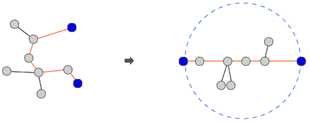
 - 이 그림 보니까 한번에 이해가능
 - 입력의 최대 크기가 $10^6$ 이라 플로이드 워셜 알고리즘 사용불가!

In [ ]:
# 트리의 지름에 관한 증명을 알아야 풀 수 있는 문제.
# https://jioneprogstdy.tistory.com/77
# 트리의 지름 : 트리의 임의의 두점 사이의 거리 중 가장 긴 것
# 어떤 한 점에서 가장 멀리 떨어져 있는 점은 트리의 지름의 양 끝점 중 하나.
# 따라서 임의의 한 점에서 가장 멀리 떨어져 있는 점(지름의 끝점 중 하나)를 찾은 후,
# 그 점에서 가장 멀리 떨어진 점(지름의 끝점 중 나머지 하나)과의 거리르 구하면 되는 문제.


import sys
sys.setrecursionlimit(10**6)
# input = sys.stdin.readline

def dfs(start, width):
    global max_width, max_node

    visited[start] = True
    if width > max_width:
        max_width = width
        max_node = start

    for next in tree[start]:
        if not visited[next[0]]:
            visited[next[0]] = True
            dfs(next[0], width + next[1])

n = int(input())
tree = [[] for _ in range(n + 1)]
visited = [False for _ in range(n + 1)]
for _ in range(n):
    node = list(map(int, input().split()))
    for i in range(1, len(node) - 1, 2):
        tree[node[0]].append([node[i], node[i + 1]])

max_width = 0
max_node = None
dfs(1, 0)

visited = [False for _ in range(n + 1)]
max_width = 0
dfs(max_node, 0)
print(max_width)

1967번 트리의 지름 <span style="color:green">성공</span> - 2025.04.20

In [ ]:
# 바로 직전 문제랑 똑같다.

import sys
sys.setrecursionlimit(10**6)
# input = sys.stdin.readline

def dfs(start, weight):
    global max_weight, max_node

    visited[start] = True
    if weight > max_weight:
        max_weight = weight
        max_node = start

    for next in tree[start]:
        if not visited[next[0]]:
            dfs(next[0], weight + next[1])

n = int(input())
tree = [[] for _ in range(n + 1)]
for _ in range(n - 1):
    p, c, w = map(int, input().split())
    tree[p].append([c, w])
    tree[c].append([p, w])

visited = [False for _ in range(n + 1)]
max_weight = 0
max_node = 0
dfs(1, 0)

visited = [False for _ in range(n + 1)]
max_weight = 0
dfs(max_node, 0)

print(max_weight)